![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Session 1 and Session 2: Assignements

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (S1 - S2)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/exercises/Session_1_2_EXERCISES.ipynb)

## Exercise 1: CSV

Analize the data of the JetBrains 2017 Python survey https://www.jetbrains.com/research/python-developers-survey-2017/

1. Download raw data from http://jb.gg/pythondevsurvey2017raw
2. Read it in pandas
3. Reproduce "What do you use Python for the most? (single answer)" chart
4. Reproduce "What do you use Python for? (multiple answers)" chart

In [272]:
%config IPCompleter.greedy=True
%load_ext memory_profiler
%matplotlib inline
%run Session_1_2_EXERCISES_Helper.ipynb
%run Session_1_2_EXERCISES_Plot.ipynb
import numpy as np
import pandas as pd
import gdown

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [18]:
url = "https://drive.google.com/uc?id=1HGBZzuYgqWtL7pZb6LjVfiCxqk9GLO-q"
output = 'pythondevsurvey2017_raw_data.csv'
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1HGBZzuYgqWtL7pZb6LjVfiCxqk9GLO-q
To: /home/scientist/projects/local_dsf/bts-dsf-2020/exercises/pythondevsurvey2017_raw_data.csv
11.0MB [00:03, 3.32MB/s]


'pythondevsurvey2017_raw_data.csv'

In [27]:
pythondevsurvey2017_df = pd.read_csv('pythondevsurvey2017_raw_data.csv')
pythondevsurvey2017_df.columns = [col.lower() for col in pythondevsurvey2017_df.columns]
pythondevsurvey2017_df.head(3)

,is python the main language you use for your current projects?,none:what other language(s) do you use?,java:what other language(s) do you use?,javascript:what other language(s) do you use?,c/c++:what other language(s) do you use?,php:what other language(s) do you use?,c#:what other language(s) do you use?,ruby:what other language(s) do you use?,bash / shell:what other language(s) do you use?,objective-c:what other language(s) do you use?,...,technical support:which of the following best describes your job role(s)?,data analyst:which of the following best describes your job role(s)?,business analyst:which of the following best describes your job role(s)?,team lead:which of the following best describes your job role(s)?,product manager:which of the following best describes your job role(s)?,cio / ceo / cto:which of the following best describes your job role(s)?,systems analyst:which of the following best describes your job role(s)?,other - write in::which of the following best describes your job role(s)?,could you tell us your age range?,what country do you live in?
0,Yes,NaN,NaN,JavaScript,NaN,PHP,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60 or older,Italy
1,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Team lead,NaN,NaN,NaN,NaN,40-49,United Kingdom
2,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40-49,France


In [32]:
pythondevsurvey2017_df.shape

(9506, 162)

In [33]:
pythondevsurvey2017_df.index

RangeIndex(start=0, stop=9506, step=1)

In [34]:
#pythondevsurvey2017_df.memory_usage(deep=True)
pythondevsurvey2017_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9506 entries, 0 to 9505
Columns: 162 entries, is python the main language you use for your current projects? to what country do you live in?
dtypes: float64(1), object(161)
memory usage: 62.8 MB


In [49]:
pythondevsurvey2017_uses_most = pythondevsurvey2017_df['what do you use python for the most?']
pythondevsurvey2017_uses_most.head(3)

0    DevOps / System administration / Writing autom...
1                                      Web development
2                                      Web development
Name: what do you use python for the most?, dtype: object

In [53]:
pythondevsurvey2017_uses_most.index

RangeIndex(start=0, stop=9506, step=1)

In [50]:
print(type(pythondevsurvey2017_uses_most))

<class 'pandas.core.series.Series'>


In [185]:
pythondevsurvey2017_uses_most_pd = pd.DataFrame({'type':pythondevsurvey2017_uses_most.values})
print(type(pythondevsurvey2017_uses_most_pd))
pythondevsurvey2017_uses_most_pd.columns

<class 'pandas.core.frame.DataFrame'>


Index(['type'], dtype='object')

In [56]:
pythondevsurvey2017_uses_most_pd.head(3)

,type
0,DevOps / System administration / Writing autom...
1,Web development
2,Web development


In [138]:
print(pd.__version__)

0.24.2


In [251]:
print(len(pythondevsurvey2017_uses_most_pd))
df_grp = pythondevsurvey2017_uses_most_pd.groupby('type').size().reset_index()
df_grp = df_grp.rename(columns={"type": "Type", 0: "Count"})
df_grp.insert(2, "Percentage", 100 * (pythondevsurvey2017_uses_most_grp_pd['Count'] / df_grp['Count'].sum()), True)
df_grp.insert(3, "Total", df_grp['Count'].sum(), True)
df_grp.insert(4, "TotalPerc", 100, True)
df_grp = df_grp.sort_values(by=['Percentage'], ascending=False)
df_grp

9506


,Type,Count,Percentage,Total,TotalPerc
15,Web development,2112,26.035503,8112,100
1,Data analysis,1430,17.628205,8112,100
4,Educational purposes,763,9.405819,8112,100
3,DevOps / System administration / Writing autom...,754,9.294872,8112,100
7,Machine learning,696,8.579882,8112,100
2,Desktop development,458,5.645957,8112,100
12,Programming of web parsers / scrapers / crawlers,300,3.698225,8112,100
11,Other - Write In:,284,3.500986,8112,100
14,Software testing / Writing automated tests,275,3.390039,8112,100
10,Network programming,268,3.303748,8112,100


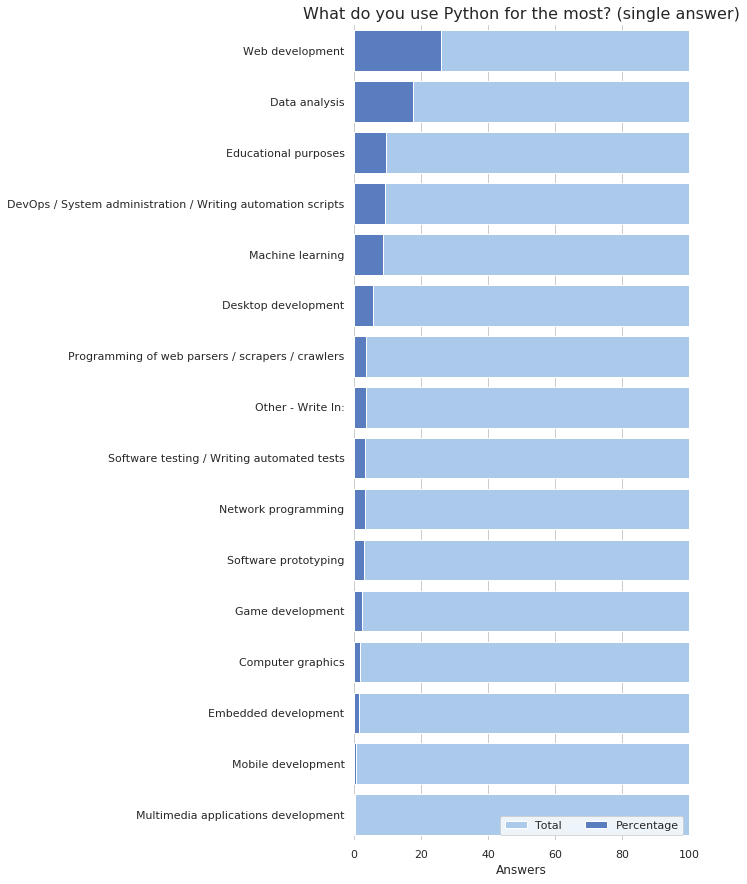

In [278]:
sns_barplot_one_var(
    df = df_grp,
    x1 = "TotalPerc",
    y1 = "Type",
    label1 = "Total",
    x2 = "Percentage",
    y2 = "Type",
    label2 = "Percentage",
    ax_label = "Answers",
    ax_title  = "What do you use Python for the most? (single answer)",
    p_xlim_right = 100
)

In [282]:
what_cols = [col for col in pythondevsurvey2017_df.columns if ':\xa0what do you use python for?' in col]
dfColVals = pd.DataFrame()
for colName in what_cols:
    dfColVals = dfColVals.append(get_col_vals(pythondevsurvey2017_df, colName, df_grp['Count'].sum()), ignore_index=True)
dfColVals = dfColVals.sort_values(by=['Percentage'], ascending=False)
dfColVals

,Answer,Count,Percentage,Total
1,Data analysis,4057,50.012327,8112
5,Web development,3991,49.198718,8112
2,DevOps / System administration / Writing autom...,2827,34.849606,8112
14,Programming of web parsers / scrapers / crawlers,2582,31.829389,8112
6,Machine learning,2542,31.336292,8112
0,Educational purposes,2279,28.094181,8112
3,Software testing / Writing automated tests,2141,26.392998,8112
4,Software prototyping,1779,21.930473,8112
10,Network programming,1692,20.857988,8112
8,Desktop development,1599,19.711538,8112


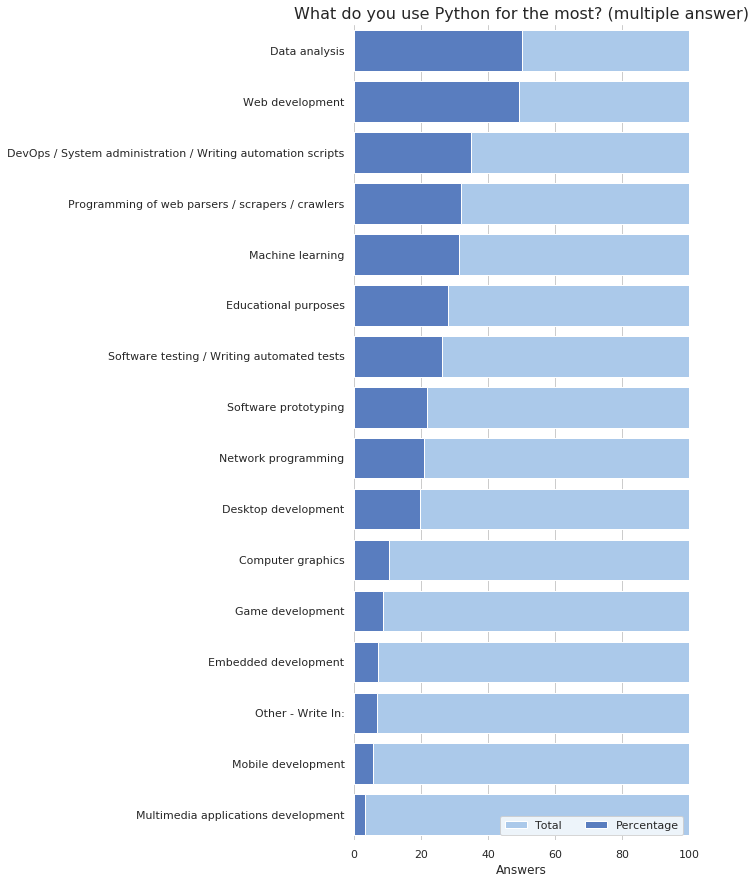

In [284]:
sns_barplot_one_var(
    df = dfColVals,
    x1 = "Total",
    y1 = "Answer",
    label1 = "Total",
    x2 = "Percentage",
    y2 = "Answer",
    label2 = "Percentage",
    ax_label = "Answers",
    ax_title  = "What do you use Python for the most? (multiple answer)",
    p_xlim_right = 100
)

# Exercise 2: slicing arrays

Given the array provided in the next cell. Do the following with slicing (check the other notebooks for examples)



*   Print the whole array using slice
*   Print number 12
*   Reverse the array
*   Reverse only one row in the array
*   Slice the first three columns in the array
*   Slice the last three columns and reverse them
*   Slice the last two rows and print them
*   Slice the last integers in a row
*   Slice rows and columns


[Here](https://machinelearningmastery.com/index-slice-reshape-numpy-arrays-machine-learning-python/) some good examples ;-)





In [ ]:
import numpy as np

a = [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15], [16, 17, 18, 19, 20]]
nd_a = np.array(a)
nd_a

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

# Exercise 3: when is best to bike alone?

Given the bike dataset:

* Download the Dataset using curl
* Open the dataset using Pandas
* Display the DataFrame
* Reply to the following questions (either by plotting the graph and summarizing the values):

    * When are the busiest hours per week in Total?
    * Where will you be more comfortable (alone) riding during the week in West or East?
    * What about riding during the business days? When and where are the best hours to ride alone between 06:00 and 10:00? And between 15:00 and 20:00?
    * What happened during the coronavirus pandemic? Did the daily riding hours change? How many riders are passing through the bridge comparing 2018 and 2020?

In [ ]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

# Exercise 4: let's get rich!

Given this apple stock history [this dataset](https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/appl_1980_2014.csv)

* Open the dataset using Pandas
* Display the DataFrame
* Reply to the following questions (either by plotting the graph and summarizing the values):

    * How much money will you have now if you bought 10 stocks for Apple at the end of January 2000 and you sold it at the end of 2013
    * When was the peak maximum of volume of trades done?
    * When was the month with the lowest close?
    * And the lowest close of the day in the whole dataset?